Interest Rate Differences Between Red and Blue States (2023)

Objective:
Analyze whether interest rates differ significantly between U.S. states classified as Red or Blue.

Key Questions:
- Do average interest rates differ by political alignment?
- Is the difference statistically significant?

Tools & Skills:
Python, Pandas, NumPy, SciPy, Matplotlib, Statistical Hypothesis Testing

Data Source: 
Excel workbook containing 2023 state-level interest rate data


Data Ingestion

In [1]:
!pip install openpyxl
import pandas as pd
df_2023 = pd.read_excel("/work/DS.project 2 FD.xlsx", sheet_name=None, engine="openpyxl")

df_2023

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 8.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


{'default_1':         state_code interest_rate
 0               FL         4.875
 1               NV         5.125
 2               WA           6.0
 3               KS         5.625
 4               WA         5.875
 ...            ...           ...
 1048570         CT           NaN
 1048571         NY           NaN
 1048572         TX           NaN
 1048573         CA           NaN
 1048574         FL           NaN
 
 [1048575 rows x 2 columns],
 'default_1 (1)':         state_code interest_rate
 0               IL           NaN
 1               FL           NaN
 2               NJ           NaN
 3               AL           NaN
 4               AZ           NaN
 ...            ...           ...
 1048570         MI           NaN
 1048571         GA           NaN
 1048572         TX           NaN
 1048573         DE           NaN
 1048574         LA           NaN
 
 [1048575 rows x 2 columns],
 'default_1 (2)':         state_code interest_rate
 0               NC           NaN
 1     

Data Integration and Cleaning

In [2]:
#concat
df = pd.concat(df_2023.values(), ignore_index=True)
df.head()

,state_code,interest_rate
0,FL,4.875
1,NV,5.125
2,WA,6.0
3,KS,5.625
4,WA,5.875


State Political Classification

Having successfully imported and combined the Excel data, I now classify U.S. states by political alignment based on the last U.S. presidential election. I used wikipedia to look up the list of Red and Blue states.

In [4]:
#Mapping states
red_states = {
    'AL', 'AK', 'AZ', 'AR', 'FL', 'GA', 'ID', 'IN', 'IA', 'KS', 'KY', 'LA',
    'MI', 'MS', 'MO', 'MT', 'NE', 'NV', 'NC', 'ND', 'OH', 'OK', 'PA', 'SC',
    'SD', 'TN', 'TX', 'UT', 'WV', 'WI', 'WY'
}

blue_states = {
    'CA', 'CO', 'CT', 'DE', 'HI', 'IL', 'ME', 'MD', 'MA', 'MN', 'NH', 'NJ',
    'NM', 'NY', 'OR', 'RI', 'VT', 'VA', 'WA'
}



Adding state color

Applied the classification function to assign each state a political color and create a new 'state_color' column

In [5]:
def classify_state(state_code):
    if state_code in red_states:
        return 'Red'
    elif state_code in blue_states:
        return 'Blue'
    else:
        return 'Other'

df['state_color'] = df['state_code'].apply(classify_state)



In [6]:
#filter out other
df = df[df['state_color'].isin(['Red', 'Blue'])]


Data Cleaning
The interest_rate column contains percentage symbols and non-numeric values.
This step standardizes the column for numerical analysis.

In [7]:
import numpy as np

df['interest_rate'] = (
    df['interest_rate']
    .replace('Exempt', np.nan)
    .str.replace('%', '', regex=False)
    .astype(float)
)


Exploratory Data Analysis (EDA)

In [9]:
#summary statistics 
df.groupby('state_color')['interest_rate'].describe()



#Red states have more data points (about 4.5M vs 2.5M).
#The mean interest rate is slightly higher in red states (6.93 vs 6.87).
#Both have the same median and upper quartile (6.75 and 7.63).
#Red states have a wider range, with a max of 120 (vs 19.63 in blue states) 

,count,mean,std,min,25%,50%,75%,max
state_color,,,,,,,,
Blue,2517877.0,6.866586,1.843947,0.0,6.000,6.75,7.625,19.625
Red,4496847.0,6.934103,1.737538,0.0,6.125,6.75,7.625,120.000


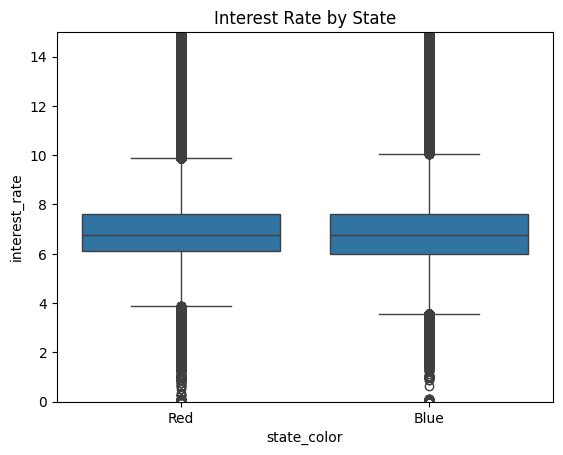

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='state_color', y='interest_rate', data=df)
plt.ylim(0, 15)
plt.title("Interest Rate by State")
plt.show()


Statistical Hypothesis Testing

In [ ]:
#statistical testing 
from scipy.stats import ttest_ind

# Split the interest rates by group
red_rates = df[df['state_color'] == 'Red']['interest_rate'].dropna()
blue_rates = df[df['state_color'] == 'Blue']['interest_rate'].dropna()


t_stat, p_value = ttest_ind(red_rates, blue_rates, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


alpha = 0.05
if p_value < alpha:
    print("The difference in interest rates between Red and Blue states is statistically significant.")
else:
    print("No statistically significant difference in interest rates between Red and Blue states.")


Key Findings and Conclusion

The analysis found a statistically significant  difference in average interest rates between Red and Blue states based on a two-sample t-test. Although the results suggest a potential association between political alignment and interest rates, the findings should be interpreted cautiously, as other economic factors may contribute to the observed differences. This project highlights proficiency in data cleaning, integration, and statistical analysis.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5254d0f0-50fe-4064-9df6-d53e42b4f942' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>